# Headers


In [9]:
import pandas as pd

In [10]:
from multi_objective_vehicle_routing_problem import *

# NDP


In [11]:
SEED = 30

In [12]:
random.seed(SEED)
np.random.seed(SEED)

In [13]:
"""
NDP problem
"""

ndp_problem = NDP_MultiObjectiveVehicleRoutingProblem(
    number_of_ndp_customer=NUMBER_OF_NDP_CUSTOMER,
    range_of_ndp_customer=RANGE_OF_NDP_CUSTOMER,
)

# ndp_problem.visualize()

ndp_algorithm = NSGA2(
    pop_size=30,
    n_offsprings=10,
    sampling=CustomRandomSampling(NUMBER_OF_NDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSM(),
    eliminate_duplicates=True,
)

# Run the optimization
ndp_res = minimize(ndp_problem, ndp_algorithm, ("n_gen", 2000), verbose=False)

# Create solution handler
ndp_solution_handler = SolutionHandler(ndp_problem.get_map_graph())
ndp_solution_handler.set_result(ndp_res)
# ndp_solution_handler.print_best_decoded_solutions(1)
# ndp_solution_handler.visualize_solution("NDP problem")



NDP_MultiObjectiveVehicleRoutingProblem


In [14]:
len(ndp_solution_handler.get_best_decoded_solutions())

30

In [15]:
ndp_solution_handler.print_best_decoded_solutions()


SOLUTION 0
[[4, 2, 3, 1, 5]]
- Maximum length among trucks: 407.25796136719254
- Number of trucks used: 1

SOLUTION 1
[[5, 1, 3, 2, 4]]
- Maximum length among trucks: 407.25796136719254
- Number of trucks used: 1

SOLUTION 2
[[2], [1, 4, 3], [5]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 3
[[5], [2, 4], [3, 1]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 4
[[3, 2, 4], [5, 1]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 5
[[3, 2, 4], [1, 5]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 6
[[5], [1, 4, 3], [2]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 7
[[5], [2], [1, 4, 3]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 8
[[4, 2], [3, 1], [5]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 9
[[5

# Loop NDP

In [16]:
# file_name = "NDP_solution_seeds.txt"

# for seed in range(10):
#     random.seed(seed)
#     np.random.seed(seed)
#     print(f"\nSEED: {seed}")

#     """
#     NDP problem
#     """
#     ndp_problem = NDP_MultiObjectiveVehicleRoutingProblem(
#         number_of_ndp_customer=NUMBER_OF_NDP_CUSTOMER,
#         range_of_ndp_customer=RANGE_OF_NDP_CUSTOMER,
#     )

#     # ndp_problem.visualize()

#     ndp_algorithm = NSGA2(
#         pop_size=30,
#         n_offsprings=10,
#         crossover=EXX(),
#         mutation=OSM(),
#         eliminate_duplicates=True,
#     )

#     # Run the optimization
#     ndp_res = minimize(ndp_problem, ndp_algorithm, ("n_gen", 200), verbose=False)

#     # Create solution handler
#     ndp_solution_handler = SolutionHandler(ndp_problem.get_map_graph())
#     ndp_solution_handler.set_result(ndp_res)
#     ndp_solution_handler.print_best_decoded_solutions()
#     # ndp_solution_handler.visualize_solution("NDP problem")

#     # num_of_solution = len(ndp_solution_handler.get_best_decoded_solutions())

#     # print(f"Seed: {seed}\tNDP solution: {num_of_solution}")

#     # if num_of_solution > 100:
#     #     with open(file_name, "a") as file:
#     #         file.write(f"Seed: {seed}\tNDP solution: {num_of_solution}\n")

# # print(f"Text written to {file_name} successfully!")

# Independent HDP


In [17]:
"""
HDP problem without solution from NDP (independent HDP problem)
"""

ind_hdp_problem = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
)

# ind_hdp_problem.visualize()

ind_hdp_algorithm = NSGA2(
    pop_size=30,
    n_offsprings=10,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSM(),
    eliminate_duplicates=True,
)

# Run the optimization
ind_hdp_res = minimize(
    ind_hdp_problem, ind_hdp_algorithm, ("n_gen", 200), verbose=False
)

# Create solution handler
ind_hdp_solution_handler = SolutionHandler(ind_hdp_problem.get_map_graph())
ind_hdp_solution_handler.set_result(ind_hdp_res)
# ind_hdp_solution_handler.print_best_decoded_solutions(1)

# ind_hdp_solution_handler.visualize_solution("Independent HDP problem")

# ind_hdp_solution_handler.print_similarity(
#     encoded_hdp_solution=ind_hdp_solution_handler.get_best_encoded_solutions(1)[0],
#     encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
# )



Independent HDP_MultiObjectiveVehicleRoutingProblem


In [18]:
ind_hdp_solution_handler.get_best_decoded_solutions()

[[[2], [7, 4], [10], [5], [8], [6, 9], [1, 3]],
 [[2], [6], [1, 9, 4], [7], [10], [5], [3, 8]],
 [[3, 6, 1], [2, 10, 4, 8, 9], [7, 5]],
 [[1, 4], [9], [7], [5], [8, 2], [3], [10, 6]],
 [[1], [7, 3], [6], [2], [5], [8, 4], [10, 9]],
 [[9, 1], [5], [7], [4, 6], [10, 3], [8], [2]],
 [[6], [9, 1], [7, 4], [10, 3], [8], [5], [2]],
 [[10, 8, 5, 4], [3, 2, 9, 6, 1, 7]],
 [[1], [7], [2], [10], [5], [8, 3], [6, 4, 9]],
 [[10, 9], [1], [5], [2], [8, 6], [4], [3, 7]],
 [[6, 9], [10, 4], [1, 3], [7], [8], [5], [2]],
 [[6, 9], [5], [1], [7], [3], [8, 10], [2, 4]],
 [[5, 1, 7, 4, 10, 8, 6, 9, 2, 3]],
 [[2, 8], [5], [3, 1], [9], [4], [7], [10, 6]],
 [[3, 2, 9, 6, 8, 10, 4, 7, 1, 5]],
 [[1], [3], [7, 6], [2], [5], [8, 4], [10, 9]],
 [[6], [9, 1, 7], [2], [10], [8], [3, 4], [5]],
 [[5], [8], [4, 1, 6], [2], [9, 10], [7], [3]],
 [[7, 3], [8], [10, 1], [4, 6], [9], [5], [2]],
 [[7], [4], [1], [9, 3], [5], [8, 2], [6, 10]],
 [[7], [3], [2], [4], [6, 10], [8, 9, 1], [5]],
 [[10, 9], [4, 1], [7], [2], [6, 8

In [19]:
len(ind_hdp_solution_handler.get_best_decoded_solutions())

30

# HDP-2F-2o

In [20]:
"""
HDP problem with initial NDP solutions (2 objectives)
"""
dep_hdp_problem_2o = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=False,
)

# dep_hdp_problem_2o.visualize()

dep_hdp_algorithm_2o = NSGA2(
    pop_size=30,
    n_offsprings=10,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSM(),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_2o = minimize(
    dep_hdp_problem_2o, dep_hdp_algorithm_2o, ("n_gen", 2000), verbose=False
)

# Create solution handler
dep_hdp_solution_handler_2o = SolutionHandler(
    dep_hdp_problem_2o.get_map_graph()
)
dep_hdp_solution_handler_2o.set_result(dep_hdp_res_2o)
# dep_hdp_solution_handler_2o.print_best_decoded_solutions(1)

# dep_hdp_solution_handler_2o.visualize_solution(
#         "Dependent HDP problem - 2 objectives"
#     )

# dep_hdp_solution_handler_2o.print_similarity(
#     encoded_hdp_solution=dep_hdp_solution_handler_2o.get_best_encoded_solutions(
#         1
#     )[0],
#     encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
# )



Dependent HDP_MultiObjectiveVehicleRoutingProblem - 2 objectives


In [21]:
len(dep_hdp_solution_handler_2o.get_best_decoded_solutions())

30

In [22]:
dep_hdp_solution_handler_2o.get_best_decoded_solutions()

[[[5], [7, 4], [2], [6], [1, 8], [9, 3, 10]],
 [[2], [4, 7, 1], [6, 3, 9], [10], [5], [8]],
 [[3, 9, 6, 2, 10, 4], [8, 5, 7, 1]],
 [[2], [4, 7, 1], [9, 3], [6, 10], [5], [8]],
 [[5], [7], [4, 2], [6, 1], [8], [9, 3, 10]],
 [[2], [4, 7, 1], [9, 3, 6, 10], [5], [8]],
 [[8], [2], [5], [10, 6, 3], [4, 7], [9, 1]],
 [[10, 6, 3], [7, 4], [1, 8], [9], [5], [2]],
 [[4, 2], [7, 1], [9], [3, 6, 10], [5], [8]],
 [[10, 2, 6, 3, 9], [1, 4, 7], [8, 5]],
 [[2], [6, 4], [5], [1, 7], [9, 3, 10], [8]],
 [[3, 8, 5, 7, 10, 2, 6, 1, 9, 4]],
 [[4, 10, 2, 6, 9, 3], [1, 7, 5, 8]],
 [[9, 6, 4], [7, 5, 8], [2, 10], [3, 1]],
 [[1, 3, 9], [7], [8], [2, 4], [6, 10], [5]],
 [[1, 3, 9], [7], [8], [4, 2], [6, 10], [5]],
 [[4, 2], [7], [1, 9, 10], [6, 3], [5], [8]],
 [[9, 3, 10], [8, 1], [4, 6], [2], [7], [5]],
 [[10, 6, 3], [5], [9, 1], [8], [7], [2, 4]],
 [[2], [4, 7, 1], [9, 3, 6], [10], [5], [8]],
 [[4, 2], [7, 1], [9, 3], [6, 10], [5], [8]],
 [[9, 6, 4], [7, 5, 8], [2, 10], [1, 3]],
 [[2, 4], [7], [1, 9], [3, 6, 

# HDP-2F-3o

In [23]:
"""
HDP problem with initial NDP solutions (3 objectives)
"""
dep_hdp_problem_3o = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=True,
)

# dep_hdp_problem_3o.visualize()

dep_hdp_algorithm_3o = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSM(),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_3o = minimize(
    dep_hdp_problem_3o, dep_hdp_algorithm_3o, ("n_gen", 200), verbose=False
)

# Create solution handler
dep_hdp_solution_handler_3o = SolutionHandler(
    dep_hdp_problem_3o.get_map_graph()
)
dep_hdp_solution_handler_3o.set_result(dep_hdp_res_3o)
# dep_hdp_solution_handler_3o.print_best_decoded_solutions(1)

# dep_hdp_solution_handler_3o.visualize_solution(
#         "Dependent HDP problem - 3 objectives"
#     )

# dep_hdp_solution_handler_3o.print_similarity(
#     encoded_hdp_solution=dep_hdp_solution_handler_3o.get_best_encoded_solutions(
#         1
#     )[0],
#     encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
# )



Dependent HDP_MultiObjectiveVehicleRoutingProblem - 3 objectives


In [24]:
len(dep_hdp_solution_handler_3o.get_best_decoded_solutions())

30

In [25]:
dep_hdp_solution_handler_3o.get_best_decoded_solutions()

[[[8, 7, 3, 2, 4], [9, 10, 6], [1, 5]],
 [[5, 1, 3, 2, 7, 8, 9, 10, 6, 4]],
 [[1, 10, 9, 4, 2, 3, 8, 7, 6, 5]],
 [[6, 1, 8], [10, 9, 3, 4], [5, 7], [2]],
 [[4, 6, 10, 9, 8, 7, 2, 3, 1, 5]],
 [[10, 1, 3, 2, 9, 8], [7, 6, 5, 4]],
 [[6, 1, 8], [4, 3, 9, 10], [7, 5], [2]],
 [[8, 5], [6, 10], [1, 9, 7], [3, 2, 4]],
 [[8, 6], [9, 3, 2, 4], [10, 5], [1, 7]],
 [[4, 2, 8, 3, 1, 9, 7, 5], [10, 6]],
 [[8, 7], [3, 2, 4], [9, 10, 6], [1, 5]],
 [[2, 3, 9, 4, 10, 8], [7, 6, 5, 1]],
 [[5, 6, 7, 8, 3, 2, 4, 9, 10, 1]],
 [[5, 6], [10, 7, 9, 1, 8], [3, 2, 4]],
 [[8, 7], [3, 2], [4, 9, 10], [6], [1, 5]],
 [[10, 8, 7, 6, 5], [4, 2, 3, 1, 9]],
 [[7, 9, 4], [6, 1, 8], [3, 2], [10, 5]],
 [[3, 2, 4, 9, 10], [1, 8, 7, 6, 5]],
 [[8, 5], [7, 10], [6], [1, 4, 3], [2, 9]],
 [[9, 2, 3, 4, 10, 8, 7, 6, 5, 1]],
 [[8, 7, 3, 2, 4], [10, 6], [9, 1, 5]],
 [[8, 7], [3, 2, 4], [9, 10], [6], [1, 5]],
 [[10, 7, 5], [8, 6, 1], [4, 3, 2, 9]],
 [[8, 10, 4, 9, 3, 2], [7, 6, 5, 1]],
 [[8, 7, 3, 2, 4], [6, 10], [9, 1, 5]],
 [[5], [

# HDP-2F-memetic

In [26]:
"""
HDP problem with initial NDP solutions (2 objectives, memetic)
"""
dep_hdp_problem_2o_memetic = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    ndp_encoded_solutions=ndp_solution_handler.get_best_encoded_solutions(),
    optimize_similality=False,
)

# dep_hdp_problem_2o_memetic.visualize()

dep_hdp_algorithm_2o_memetic = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_encoded_solutions()),
    n_offsprings=50,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=EXX(),
    mutation=OSM(),
    eliminate_duplicates=True,
)

# Run the optimization
dep_hdp_res_2o_memetic = minimize(
    dep_hdp_problem_2o_memetic,
    dep_hdp_algorithm_2o_memetic,
    ("n_gen", 200),
    verbose=False,
)

# Create local search handler
dep_hdp_local_search_handler_2o_memetic = LocalSearchHandler(
    dep_hdp_problem_2o_memetic.get_map_graph()
)
dep_hdp_local_search_handler_2o_memetic.set_result(dep_hdp_res_2o_memetic)
# dep_hdp_local_search_handler_2o_memetic.calculate_local_search(
#     ndp_encoded_solution_list=ndp_solution_handler.get_best_encoded_solutions()
# )

# dep_hdp_local_search_handler_2o_memetic.print_best_decoded_solutions(1)

# dep_hdp_local_search_handler_2o_memetic.visualize_solution(
#         "Dependent HDP problem - 2 objectives - memetic"
#     )

# dep_hdp_local_search_handler_2o_memetic.print_similarity(
#     encoded_hdp_solution=dep_hdp_local_search_handler_2o_memetic.get_best_encoded_solutions(
#         1
#     )[
#         0
#     ],
#     encoded_ndp_solution_list=ndp_solution_handler.get_best_encoded_solutions(),
# )



Dependent HDP_MultiObjectiveVehicleRoutingProblem - 2 objectives


Dependent HDP_MultiObjectiveVehicleRoutingProblem - 2 objectives - memetic


In [27]:
len(dep_hdp_local_search_handler_2o_memetic.get_best_decoded_solutions())

30

In [28]:
dep_hdp_local_search_handler_2o_memetic.get_best_decoded_solutions()

[[[2], [5], [4, 7, 8], [1], [6, 3, 10, 9]],
 [[4, 8, 7], [6, 3], [5], [10, 1], [9, 2]],
 [[3, 6, 9], [5], [2], [10, 7, 1], [4, 8]],
 [[2], [5], [8, 7], [4, 1], [6, 3, 10, 9]],
 [[7, 4, 2, 6, 3, 1, 5], [8, 9, 10]],
 [[1], [4, 7, 8], [5], [2, 9], [6, 3, 10]],
 [[5], [1, 6], [10, 3], [8, 7], [9, 2, 4]],
 [[6, 3, 10, 7], [2], [5], [8], [1, 4, 9]],
 [[9, 2, 4], [8, 7], [6, 3], [1, 10], [5]],
 [[5], [8, 7, 4], [1, 10], [3, 6], [9, 2]],
 [[2, 9], [5], [10, 1], [7, 3, 6], [8, 4]],
 [[9, 2], [4, 8, 10], [5], [6, 1], [7, 3]],
 [[10, 3, 6], [7, 8], [5], [2, 9, 4], [1]],
 [[9, 4, 7], [10, 3, 6, 1], [2], [5], [8]],
 [[10, 3, 6], [7, 8], [5], [9, 2], [4, 1]],
 [[7, 5, 1], [6, 3, 8, 2, 10, 9, 4]],
 [[9], [2], [5], [4, 7, 8], [1, 6, 3, 10]],
 [[2], [5], [4, 7, 8], [1, 6, 3, 10], [9]],
 [[10, 4, 1], [5], [8, 9, 7], [3, 6], [2]],
 [[5], [2, 9], [10, 8, 4], [6], [1, 3, 7]],
 [[9, 2], [5], [8, 7, 4], [1, 10], [3, 6]],
 [[6, 3], [4, 7, 9, 10, 1], [8], [5], [2]],
 [[3, 6], [10, 2], [7, 9, 4, 1], [8], [5]],


# Visualization prep


## Helper functions


In [ ]:
def segment_customers_orders_by_cars(customers_orders):
    customers_by_cars_solutions = [
        np.array_split(
            customers_order, np.random.randint(1, len(customers_orders[0]) + 1)
        )
        for customers_order in customers_orders
    ]
    customers_by_cars_solutions = [
        [list(car + 1) for car in solution] for solution in customers_by_cars_solutions
    ]

    return customers_by_cars_solutions

In [ ]:
def find_edges_including_depot(solution):
    edges = []
    for car in solution:
        if len(car) == 0:
            continue
        edges.append([0, car[0]])
        if len(car) > 1:
            for i in range(len(car) - 1):
                edge = [car[i], car[i + 1]]
                edges.append(edge)
        edges.append([car[-1], 0])
    return edges

In [ ]:
def calulate_similarity_single_pair(hdp_edges, ndp_edges):
    # Initialize a counter for similar edges
    similar_count = 0

    # Convert edges to sets for easier comparison
    hdp_edges_set = set(map(tuple, hdp_edges))
    ndp_edges_set = set(map(tuple, ndp_edges))

    # Count the number of similar edges
    similar_count = len(hdp_edges_set.intersection(ndp_edges_set))

    return similar_count / len(ndp_edges)

In [ ]:
def caclculate_similarity_hdp_to_set_ndps(hdp_solution, ndp_solutions_set):
    hdp_edges = find_edges_including_depot(hdp_solution)
    ndp_solutions_edges = [
        find_edges_including_depot(ndp_solution) for ndp_solution in ndp_solutions_set
    ]

    # Calculate similarities using list comprehension
    similarities = [
        calulate_similarity_single_pair(hdp_edges, ndp_edges)
        for ndp_edges in ndp_solutions_edges
    ]
    max_similarity_index = np.argmax(similarities)
    max_similarity = similarities[max_similarity_index]
    corresponding_edge = ndp_solutions_edges[max_similarity_index]

    return max_similarity, corresponding_edge, hdp_edges

In [ ]:
distance_matrix_dep_hdp = dep_hdp_problem_2o.get_map_graph().distance_matrix
# distance_matrix_dep_hdp = pd.DataFrame(distance_matrix_dep_hdp)
distance_matrix_dep_hdp

array([[  0.        ,  60.30967754,  76.19647632,  94.90577534,
         18.17040223,  22.9768717 ,  46.59278948,  30.56182195,
         77.79884264,  50.39701736,  50.15986701],
       [ 60.30967754,   0.        ,  58.7864378 , 151.65098871,
         63.67950437,  73.38650874,  44.70864875,  67.72021728,
        133.25435851,  90.96642058,  73.59211018],
       [ 76.19647632,  58.7864378 ,   0.        , 167.37825266,
         91.14485498,  98.60747711,  93.82056105,  56.73228859,
        151.96613603,  67.8485267 , 116.06527653],
       [ 94.90577534, 151.65098871, 167.37825266,   0.        ,
         87.99105773,  78.27985598, 117.58354298, 111.33155918,
         18.97353629, 111.31584748,  92.42068211],
       [ 18.17040223,  63.67950437,  91.14485498,  87.99105773,
          0.        ,   9.71120688,  36.09751664,  48.7211908 ,
         69.58643048,  67.54500078,  32.36127622],
       [ 22.9768717 ,  73.38650874,  98.60747711,  78.27985598,
          9.71120688,   0.        ,  43.8

In [ ]:
dep_hdp_solution_handler_2o.get_best_decoded_solutions()

[[[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 2, 9, 1], [3, 8, 5, 10, 6, 4]],
 [[7, 2, 9, 1], [3, 8, 5, 10, 6, 4]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[5, 8, 3], [2, 9, 7, 4], [1, 10, 6]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 2, 9, 1], [3, 8, 5, 10, 6, 4]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 2, 9, 1], [3, 8, 5, 6, 10, 4]],
 [[7, 2, 9, 1], [3, 8, 5, 6, 10, 4]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[1, 6, 10, 5], [9, 2], [3, 4], [7, 8]],
 [[7, 9, 2, 1, 5, 4, 10, 6, 8, 3]],
 [[5, 3, 8], [2, 1], [9], [6], [10, 7, 4]]]

In [ ]:
nested_list = dep_hdp_solution_handler_2o.get_best_decoded_solutions()

## Results


In [ ]:
results_dep = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_dep):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_dep.loc[i,'similarities'] = max_similarity
    results_dep.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_dep.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_dep

NameError: name 'hdp_customers_by_cars_dep' is not defined

In [ ]:
results_ind = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_ind):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_ind.loc[i,'similarities'] = max_similarity
    results_ind.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_ind.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_ind


similarities  number of vehicles  max distance
0       0.333333                 1.0    963.065703
1       0.777778                 6.0    379.354460
2       0.714286                 5.0    235.700567
3       0.625000                 3.0    428.601254
4       0.888889                 7.0    259.584368
..           ...                 ...           ...
95      0.333333                 1.0   1192.919290
96      0.750000                 5.0    353.301056
97      0.777778                 6.0    319.653584
98      0.750000                 4.0    401.078379
99      0.666667                 2.0    613.712085

[100 rows x 3 columns]

In [ ]:
results_3obj = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_3obj):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_3obj.loc[i,'similarities'] = max_similarity
    results_3obj.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_3obj.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_3obj


similarities  number of vehicles  max distance
0       0.888889                 8.0    220.611600
1       0.800000                 7.0    346.267854
2       0.428571                 1.0    892.884286
3       0.500000                 3.0    540.302236
4       0.500000                 2.0    530.302137
..           ...                 ...           ...
95      0.800000                 7.0    240.076371
96      0.888889                 7.0    247.708952
97      0.900000                 9.0    220.611600
98      0.888889                 7.0    353.831342
99      0.666667                 3.0    404.092359

[100 rows x 3 columns]

# 2F vs Independent


In [ ]:
average_dep = results_dep.groupby('number of vehicles').mean()
average_dep

similarities  max distance
number of vehicles                            
1.0                     0.476190   1075.629232
2.0                     0.552381    639.027132
3.0                     0.528628    486.742023
4.0                     0.632021    407.845096
5.0                     0.714286    354.316086
6.0                     0.791171    326.230565
7.0                     0.832576    307.827568
8.0                     0.871605    282.821730
9.0                     0.946875    277.749147
10.0                    1.000000    220.611600

In [ ]:
average_ind = results_ind.groupby('number of vehicles').mean()
average_ind


similarities  max distance
number of vehicles                            
1.0                     0.420635   1039.046390
2.0                     0.514550    635.739523
3.0                     0.648810    437.524172
4.0                     0.672619    399.393655
5.0                     0.725088    311.767475
6.0                     0.733560    344.072053
7.0                     0.844444    289.338631
8.0                     0.918326    302.878125
9.0                     0.919444    244.728311
10.0                    1.000000    220.611600

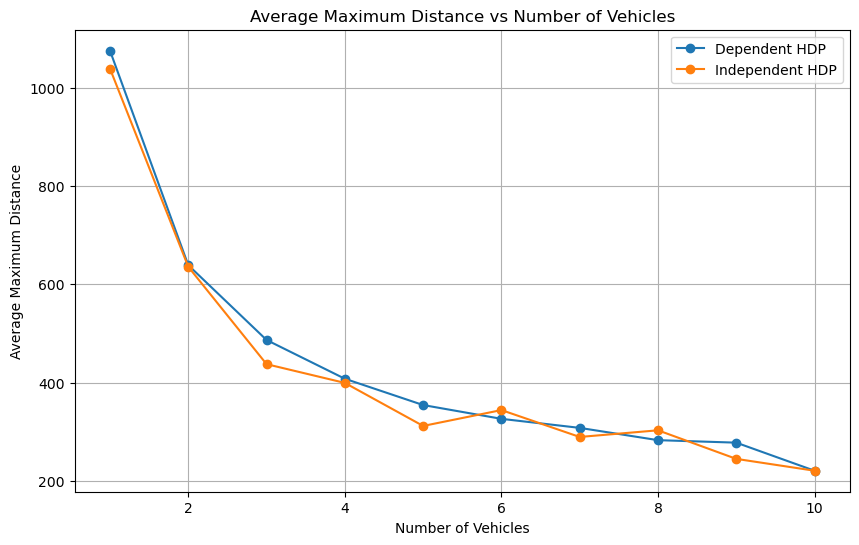

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['max distance'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(average_ind.index, average_ind['max distance'], label='Independent HDP', marker='o')

# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Maximum Distance')
plt.title('Average Maximum Distance vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

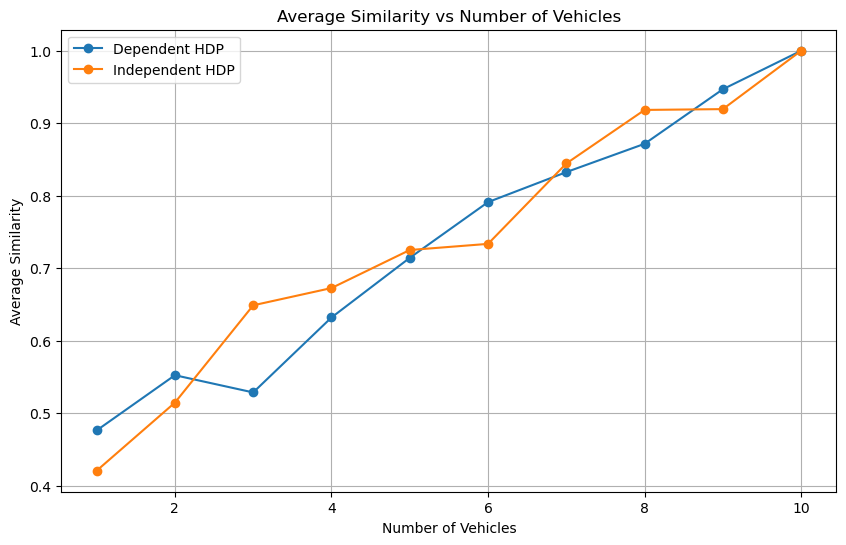

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['similarities'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(average_ind.index, average_ind['similarities'], label='Independent HDP', marker='o')

# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# 2F EMO 3 vs 2F EMO 2


In [ ]:
results_3obj

similarities  number of vehicles  max distance
0       0.888889                 8.0    220.611600
1       0.800000                 7.0    346.267854
2       0.428571                 1.0    892.884286
3       0.500000                 3.0    540.302236
4       0.500000                 2.0    530.302137
..           ...                 ...           ...
95      0.800000                 7.0    240.076371
96      0.888889                 7.0    247.708952
97      0.900000                 9.0    220.611600
98      0.888889                 7.0    353.831342
99      0.666667                 3.0    404.092359

[100 rows x 3 columns]

In [ ]:
# Get the index of the minimum similarity for each number of vehicles
min_similarity_indices = results_3obj.groupby('number of vehicles')['similarities'].idxmin()

# Retrieve the rows corresponding to those indices
min_similarity_3obj = results_3obj.loc[min_similarity_indices]
min_similarity_3obj = min_similarity_3obj.set_index('number of vehicles')
min_similarity_3obj

similarities  max distance
number of vehicles                            
1.0                     0.166667   1001.029444
2.0                     0.500000    530.302137
3.0                     0.428571    445.310374
4.0                     0.500000    395.195515
5.0                     0.625000    401.193546
6.0                     0.666667    346.267854
7.0                     0.700000    220.611600
8.0                     0.800000    220.611600
9.0                     0.900000    234.308745
10.0                    1.000000    220.611600

In [ ]:
# Get the index of the maximum similarity for each number of vehicles
max_similarity_indices = results_3obj.groupby('number of vehicles')['similarities'].idxmax()

# Retrieve the rows corresponding to those indices
max_similarity_3obj = results_3obj.loc[max_similarity_indices]
max_similarity_3obj = max_similarity_3obj.set_index('number of vehicles')
max_similarity_3obj


similarities  max distance
number of vehicles                            
1.0                     0.571429   1028.263527
2.0                     0.666667    516.618407
3.0                     0.714286    542.479872
4.0                     0.714286    353.831342
5.0                     0.857143    353.831342
6.0                     0.888889    353.301056
7.0                     0.888889    247.708952
8.0                     1.000000    225.857969
9.0                     1.000000    221.711427
10.0                    1.000000    220.611600

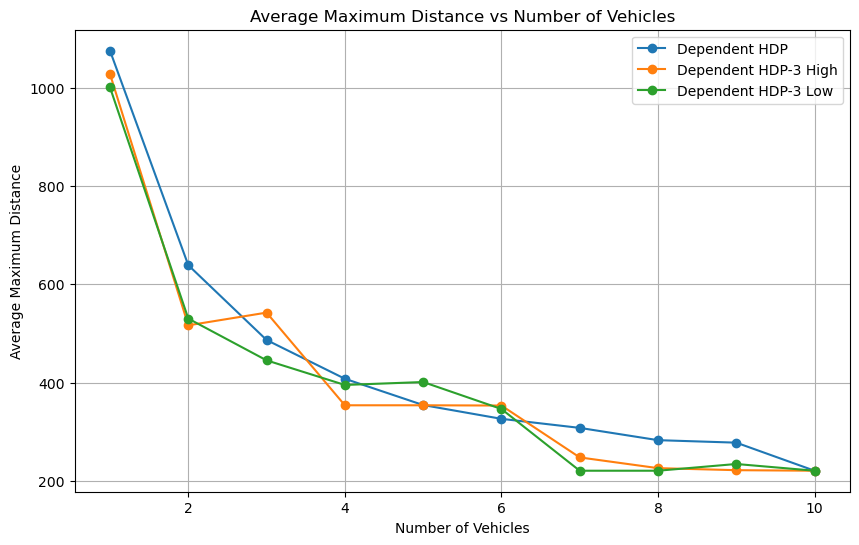

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['max distance'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(max_similarity_3obj.index, max_similarity_3obj['max distance'], label='Dependent HDP-3 High', marker='o')

plt.plot(min_similarity_3obj.index, min_similarity_3obj['max distance'], label='Dependent HDP-3 Low', marker='o')


# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Maximum Distance')
plt.title('Average Maximum Distance vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
# Get the index of the minimum distance for each number of vehicles
min_distance_indices = results_3obj.groupby('number of vehicles')['max distance'].idxmin()

# Retrieve the rows corresponding to those indices
min_distance_3obj = results_3obj.loc[min_distance_indices]
min_distance_3obj = min_distance_3obj.set_index('number of vehicles')
min_distance_3obj

similarities  max distance
number of vehicles                            
1.0                     0.428571    892.884286
2.0                     0.666667    516.618407
3.0                     0.666667    264.808244
4.0                     0.571429    283.815110
5.0                     0.714286    235.700567
6.0                     0.777778    240.076371
7.0                     0.750000    220.611600
8.0                     0.888889    220.611600
9.0                     0.900000    220.611600
10.0                    1.000000    220.611600

In [ ]:
# Get the index of the maximum distance for each number of vehicles
max_distance_indices = results_3obj.groupby('number of vehicles')['max distance'].idxmax()

# Retrieve the rows corresponding to those indices
max_distance_3obj = results_3obj.loc[max_distance_indices]
max_distance_3obj = max_distance_3obj.set_index('number of vehicles')
max_distance_3obj

similarities  max distance
number of vehicles                            
1.0                     0.500000   1246.457766
2.0                     0.500000    869.926577
3.0                     0.500000    697.935404
4.0                     0.625000    428.601254
5.0                     0.714286    401.193546
6.0                     0.666667    401.193546
7.0                     0.875000    385.792462
8.0                     0.888889    401.193546
9.0                     1.000000    385.792462
10.0                    1.000000    220.611600

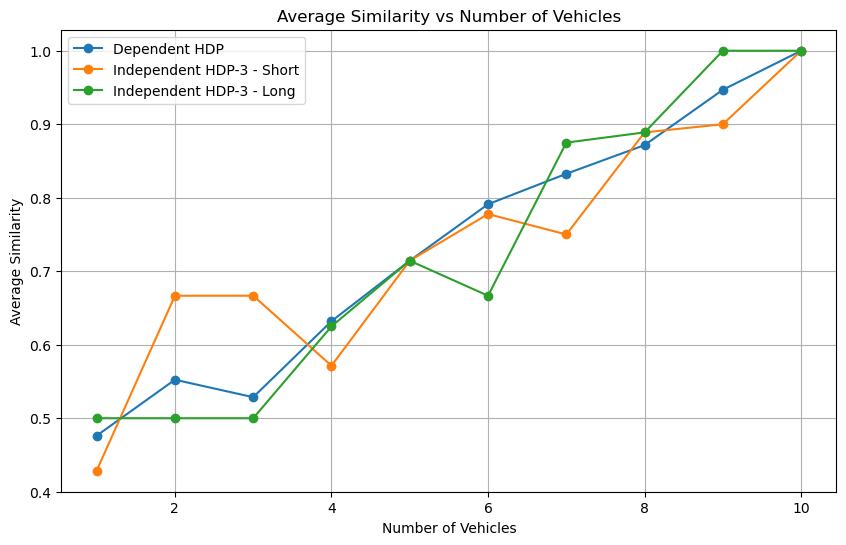

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['similarities'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(min_distance_3obj.index, min_distance_3obj['similarities'], label='Independent HDP-3 - Short', marker='o')

plt.plot(max_distance_3obj.index, max_distance_3obj['similarities'], label='Independent HDP-3 - Long', marker='o')


# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()